### A support vector machine (SVM) to classify images of cats and dogs 

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split



In [49]:


# Load and preprocess the dataset
dir = "data_path"

categories = ["Cat", "Dog"]

X = []
y = []

for ctg in categories:
    path = os.path.join(dir, ctg)
    label = categories.index(ctg)
    
    for img in os.listdir(path):
        try:
            imgpath = os.path.join(path, img)
            img2 = cv2.imread(imgpath, cv2.IMREAD_GRAYSCALE)
            img2 = cv2.resize(img2, (120,120))

            X.append(img2)
            y.append(label)
        except Exception as e:
            pass
        


In [50]:
X = np.array(X).reshape(-1, 120, 120)
y = np.array(y)
len(X)

936

In [51]:
nsamples, nx, ny = X.shape
X = X.reshape((nsamples,nx*ny))

In [52]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

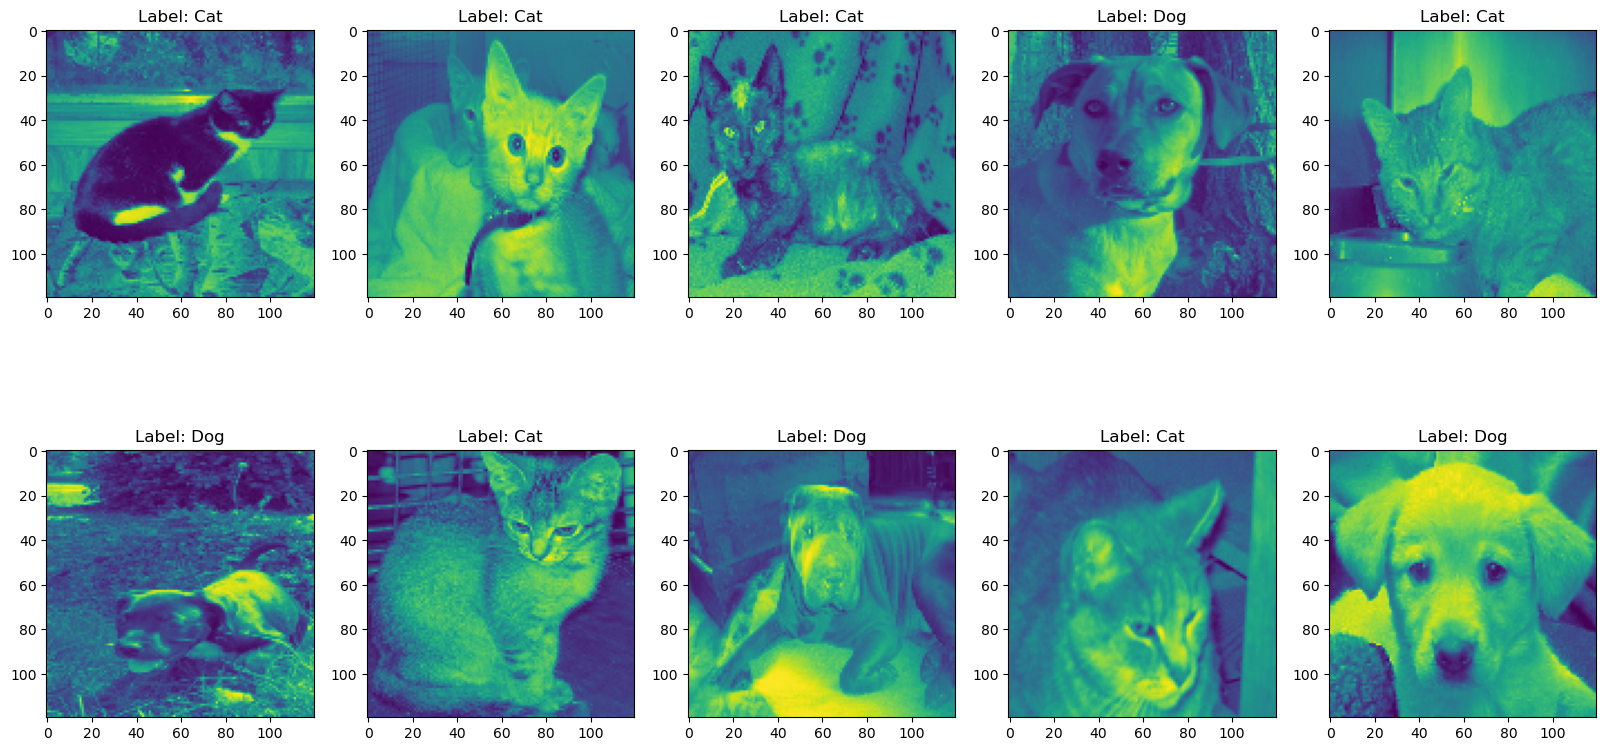

In [53]:
# Show 10 images from the training dataset
plt.figure(figsize=(20, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(120, 120))  # Assuming image_shape is the shape of the image
    plt.title("Label: " + categories[y_train[i]])
plt.show()


In [54]:

# Train the SVM model
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)


SVC()

In [55]:

# Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.601063829787234


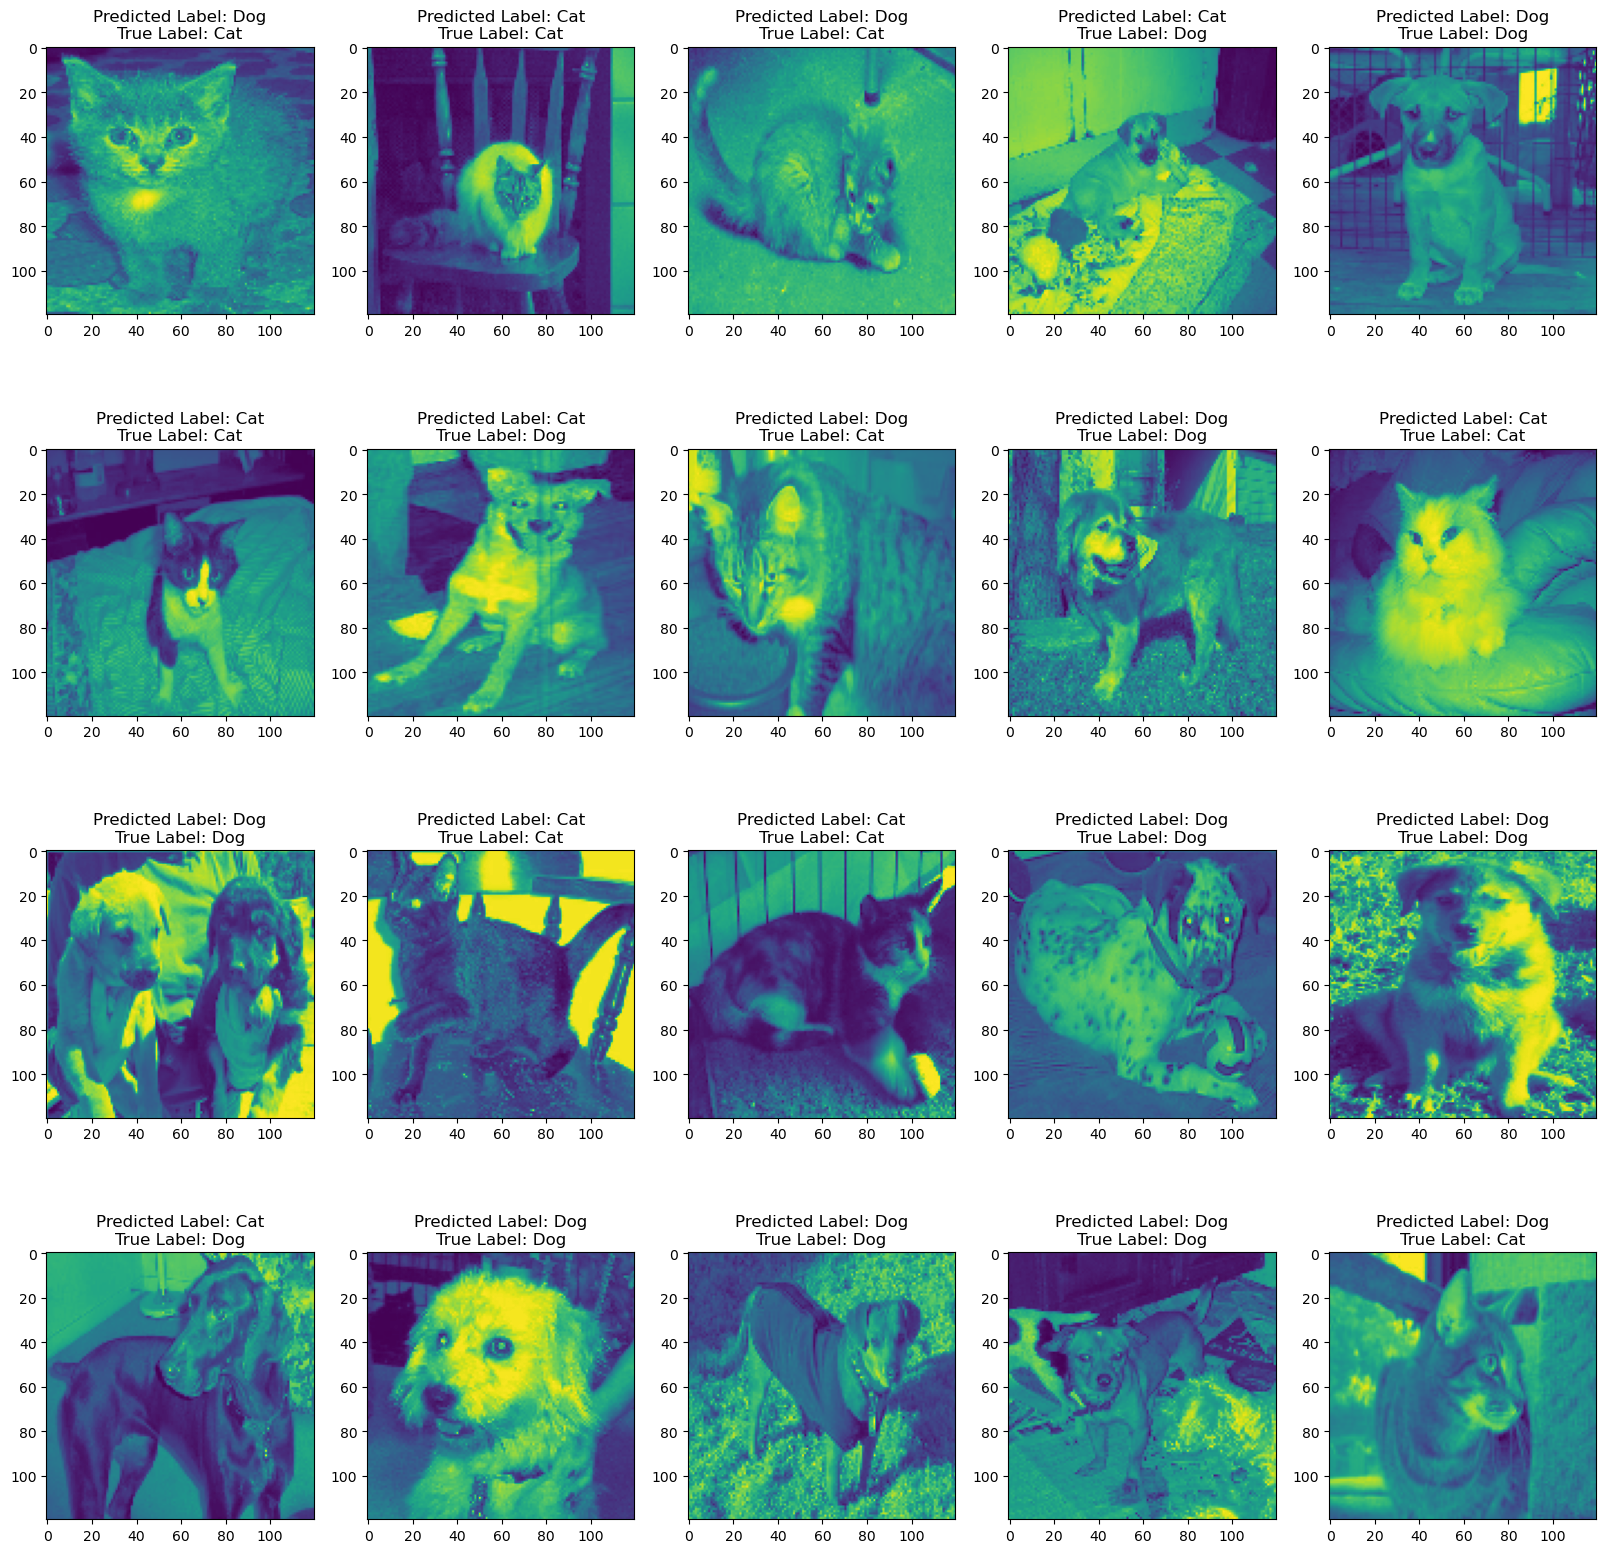

In [56]:

# Show 10 images from the testing dataset with predictions
plt.figure(figsize=(20, 20))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_test[i].reshape(120, 120))  # Assuming image_shape is the shape of the image
    prediction = clf.predict(X_test[i].reshape(1, -1))
    plt.title("Predicted Label: " + categories[prediction[0]] + "\nTrue Label: " + categories[y_test[i]])
plt.show()